# Bayes Assignment

**Author:** [Tony Kabilan Okeke](mailto:tko35@drexel.edu)

In [27]:
from scipy import integrate
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

## Bayes Decision Theory

Write code to answer each question and print out the result (so that the result
would be part of your PDF report).

Consider the following class-conditional density functions. Note that the $N()$
notation below is given as $N(mean, variance)$$. Make sure you pay attention to
the difference between standard deviation and variance in any function you use.

1. $P(x | w_1) = N(1,1)$
2. $P(x | w_2) = N(2, 3^2)$ (This is a normal distribution of 3, variance of 9).
3. And the folllowing prior probabilities:
   1. $P(w_1) = 0.6$
   2. $P(w_2) = 0.4$

In [119]:
# Define function for generating normal distribution
N = lambda x, mu, sigma: stats.norm.pdf(x, mu, sigma)

# Define function for plotting probability distribution curve
def plot_dist(x, y, color, label, ax):
    ax.plot(x, y, color=color, lw=1, label=label)
    ax.fill_between(x, y, color=color, alpha=0.2)

# Function for classifying a point
def classify(X, x, LR):
    # Locate the closest x value
    idx = np.argmin(np.abs(x - X))

    # Calculate the likelihood ratio
    print(f"Likelihood Ratio = {LR[idx]:.4f} for x = {X}")

    # Print class
    if LR[idx] > 1:
        print("Classified as w1")
    else:
        print("Classified as w2")

### PDFs:  $P(x|w_1)$ and $P(x|w_2)$

Plot the PDFs for $P(x|w_1)$ and $P(x|w_2)$ for `x = -10:0.15:10` on the same
figure.

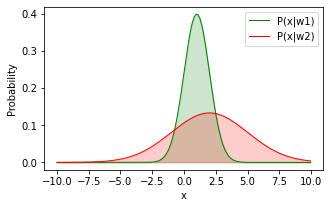

In [104]:
# Define x range and distributions
x = np.arange(-10, 10, 0.15)
Pxw1 = N(x, 1, 1)
Pxw2 = N(x, 2, 3)

# PLot the PDFs P(x|w1) and P(x|w2)
fig, ax = plt.subplots(figsize=(5, 3))
plot_dist(x, Pxw1, 'green', 'P(x|w1)', ax)
plot_dist(x, Pxw2, 'red', 'P(x|w2)', ax)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.legend();

### Posterior Probabilities: $P(w_1|x)$ and $P(w_2|x)$

**Note:** For any given x, the posterior probabilities must sum to 1.

$$
\begin{align*}
posterior &= \frac{likelihood * prior}{evidence} \\
P(w|x) &= \frac{P(x|w) * P(w)}{P(x)} \\
evidence &= P(x|w_1) * P(w_1) + P(x|w_2) * P(w_2) \\
P(w_1) = 0.6, &~ P(w_2) = 0.4
\end{align*}
$$

P(w1|x) + P(w2|x) = 19.950000000000045


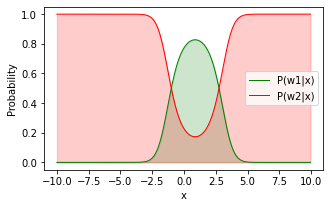

In [37]:
# Define prior probabilities and evidence
Pw1, Pw2 = 0.6, 0.4
Pe = Pxw1 * Pw1 + Pxw2 * Pw2

# Calculate posterior probabilities
Pw1x = Pxw1 * Pw1 / Pe
Pw2x = Pxw2 * Pw2 / Pe

# Check if the posterior probabilities sum to 1
print('P(w1|x) + P(w2|x) =', integrate.trapz(Pw1x, x) + integrate.trapz(Pw2x, x))

# Plot the posterior probabilities
fig, ax = plt.subplots(figsize=(5, 3))
plot_dist(x, Pw1x, 'green', 'P(w1|x)', ax)
plot_dist(x, Pw2x, 'red', 'P(w2|x)', ax)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.legend();

P(w1|x) + P(w2|x) = 1.0


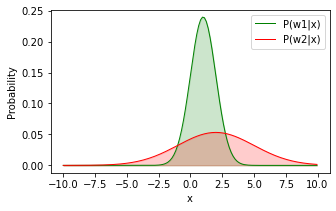

In [38]:
# Define prior probabilities and evidence
Pw1, Pw2 = 0.6, 0.4
Pe = integrate.trapz(Pxw1 * Pw1 + Pxw2 * Pw2, x)

# Calculate posterior probabilities
Pw1x = Pxw1 * Pw1 / Pe
Pw2x = Pxw2 * Pw2 / Pe

# Check if the posterior probabilities sum to 1
print('P(w1|x) + P(w2|x) =', integrate.trapz(Pw1x, x) + integrate.trapz(Pw2x, x))

# Plot the posterior probabilities
fig, ax = plt.subplots(figsize=(5, 3))
plot_dist(x, Pw1x, 'green', 'P(w1|x)', ax)
plot_dist(x, Pw2x, 'red', 'P(w2|x)', ax)
ax.set_xlabel('x')
ax.set_ylabel('Probability')
plt.legend();

### Likelihood Ratio: $\frac{P(w_1|x)}{P(w_2|x)}$ and Decision Threshold(s)

Print the values of the decision thresholds, as well as plot them as lines on
the likelihood ratio plot. You may find the decision boundaries analytically
(using `syms` & `solve()`) or using an external tool (e.g., Wolfram-Alpha) and
hardcoding what you get from the external tool.

Decision boundary: [-1.15  2.75]


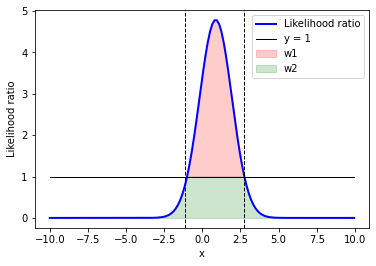

In [123]:
# Calculate the likelihood ratio
LR = Pw1x / Pw2x

# Calculate the decision boundary
x_decision = x[np.argmax(LR > 1)]

# Define y = 1 line
decision = np.repeat(1, len(x))

# Find the decision boundary
I = np.argwhere(np.diff(np.sign(decision - LR))).flatten()
x_decision = x[I]

# Plot the likelihood ratio
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, LR, color='blue', lw=2, label='Likelihood ratio')
ax.plot(x, decision, color='black', lw=1, label='y = 1')
for i in range(len(x_decision)):
    ax.axvline(x=x_decision[i], color='black', linestyle='--', lw=1)

# Shade the decision regions
ax.fill_between(
    x, LR, 1, where=LR > decision, color='red', alpha=0.2, label='w1'
)
ax.fill_between(
    x, np.where(LR > 1, 1, LR), color='green', alpha=0.2, label='w2'
)

# Labels and legend
ax.set_xlabel('x')
ax.set_ylabel('Likelihood ratio')
plt.legend();

# Print the decision boundary
print('Decision boundary:', x_decision)

#### Likelihood Ratio for a Sample with `x = -3`

Print the value of the likelihood ratio. Comment/print how you would classify
this sample; as $w_1$ or $w_2$?

In [120]:
classify(-3, x, LR)

Likelihood Ratio = 0.0072 for x = -3
Classified as w2


#### Likelihood Ratio for a Sample with `x = 0`

Print the value of the likelihood ratio. Comment/print how you would classify
this sample; as $w_1$ or $w_2$?

In [121]:
classify(0, x, LR)

Likelihood Ratio = 3.5398 for x = 0
Classified as w1


#### Likelihood Ratio for a Sample with `x = 3`

Print the value of the likelihood ratio. Comment/print how you would classify
this sample; as $w_1$ or $w_2$?

In [122]:
classify(3, x, LR)

Likelihood Ratio = 0.5851 for x = 3
Classified as w2


## Monty Hall Simulation

Keep the test cases below as they are.

In [ ]:
# 0: Never switch door
winratio = hwbayes_montyhall(0, 1000)
print('Win ratio when never switching door: {:.2f}%'.format(winratio*100))

In [ ]:
# 1: Always switch door
winratio = hwbayes_montyhall(1, 1000)
print('Win ratio when always switching door: {:.2f}%'.format(winratio*100))

In [ ]:
# 2: Switch door at random (switch or stay with equal probability)
winratio = hwbayes_montyhall(2, 1000)
print('Win ratio when switching door at random: {:.2f}%'.format(winratio*100))